In [1]:
import matplotlib.pyplot as plt
import numpy as np

import ambulance_game as abg

# Simulation

In [2]:
params = {
    "lambda_1" : 1,
    "lambda_2" : 0.5,
    "mu" : 0.6,
    "num_of_servers" : 3,
    "threshold" : 2,
    "system_capacity" : 4,
    "buffer_capacity" : 2,
}

![models](Bin/DES_model.PNG)

In [3]:
simulation = abg.simulation.simulate_model(seed_num=2, **params)

In [4]:
Inds = simulation.get_all_individuals()
Inds[5].data_records

[Record(id_number=6, customer_class=0, node=1, arrival_date=6.248689710286126, waiting_time=0.0, service_start_date=6.248689710286126, service_time=0.0, service_end_date=6.248689710286126, time_blocked=0.04536459946725291, exit_date=6.2940543097533785, destination=2, queue_size_at_arrival=0, queue_size_at_departure=0),
 Record(id_number=6, customer_class=0, node=2, arrival_date=6.2940543097533785, waiting_time=0.0, service_start_date=6.2940543097533785, service_time=2.139635647202719, service_end_date=8.433689956956098, time_blocked=0.0, exit_date=8.433689956956098, destination=-1, queue_size_at_arrival=1, queue_size_at_departure=1)]

# Markov Chain

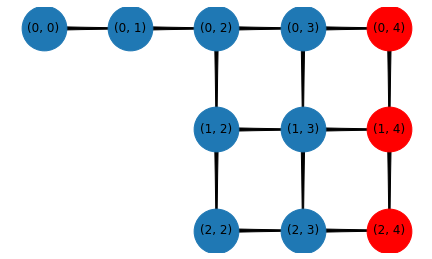

In [5]:
abg.markov.visualise_markov_chain(
    num_of_servers=params["num_of_servers"],
    threshold=params["threshold"],
    system_capacity=params["system_capacity"],
    buffer_capacity=params["buffer_capacity"],
);

In [6]:
Q = abg.markov.get_transition_matrix(**params)
Q

array([[-1.5,  1.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0.6, -2.1,  1.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  1.2, -2.7,  0.5,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  1.2, -2.7,  0.5,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  1.2, -2.2,  0. ,  0. ,  1. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  1.8,  0. ,  0. , -3.3,  0.5,  0. ,  1. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  1.8,  0. ,  0. , -3.3,  0.5,  0. ,  1. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  1.8,  0. ,  0. , -2.8,  0. ,  0. ,  1. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  1.8,  0. ,  0. , -2.3,  0.5,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  1.8,  0. ,  0. , -2.3,  0.5],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  1.8,  0. ,  0. , -1.8]])

$$
    \Large{\frac{d\pi}{dt} = \pi Q = 0}
$$

In [7]:
pi = abg.markov.get_steady_state_numerically(Q)
pi

array([0.06215563, 0.15538908, 0.19423635, 0.12705875, 0.09843256,
       0.07715779, 0.07101188, 0.08501237, 0.03354687, 0.03816753,
       0.05783119])

# Performance Measures

In [8]:
simulation_records = simulation.get_all_records()

## Waiting time

In [9]:
waiting_times = [r.waiting_time for r in simulation_records if r.node==2]
mean_wait = abg.markov.get_mean_waiting_time_using_markov_state_probabilities(**params)

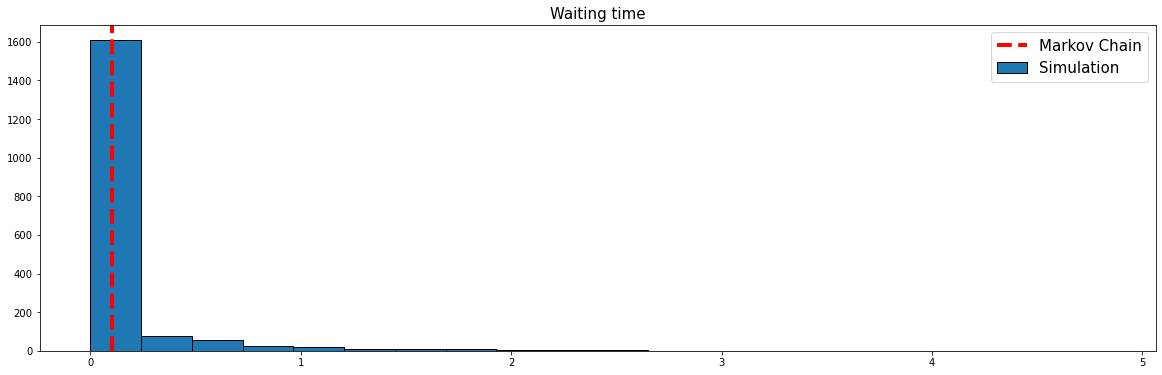

In [10]:
plt.figure(figsize=(20, 6))
plt.hist(waiting_times, bins=20, ec="black")
plt.axvline(mean_wait, color="red", linestyle="dashed", linewidth=4)
plt.title("Waiting time", fontsize=15)
plt.legend(["Markov Chain", "Simulation"], fontsize=15);

## Blocking time

In [11]:
blocking_times = [r.time_blocked for r in simulation_records if r.node==1]
mean_block = abg.markov.get_mean_blocking_time_using_markov_state_probabilities(**params)

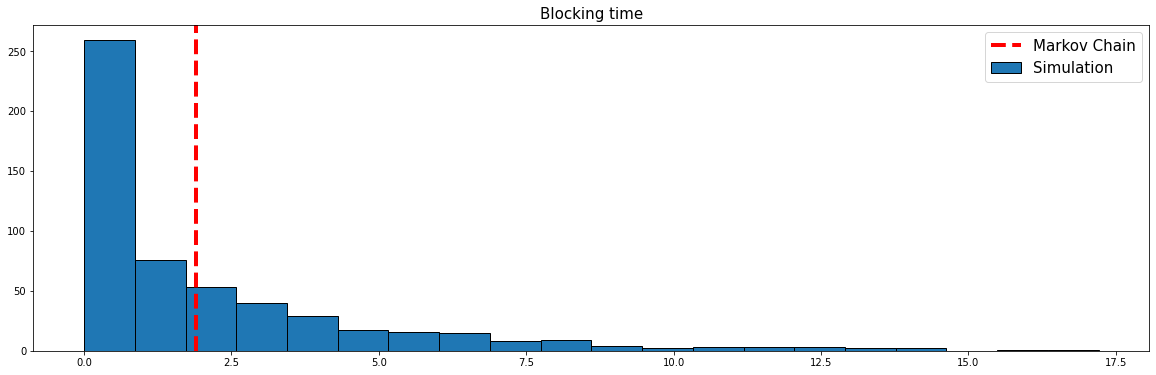

In [12]:
plt.figure(figsize=(20, 6))
plt.hist(blocking_times, bins=20, ec="black")
plt.axvline(mean_block, color="red", linestyle="dashed", linewidth=4)
plt.title("Blocking time", fontsize=15)
plt.legend(["Markov Chain", "Simulation"], fontsize=15);

## Proportion within individuals within target

In [13]:
total_2, target_2, total_1, target_1 = abg.simulation.extract_total_individuals_and_the_ones_within_target_for_both_classes(individuals=Inds, target=4)
mean_prop = abg.markov.proportion_within_target_using_markov_state_probabilities(class_type=None, target=4, **params)

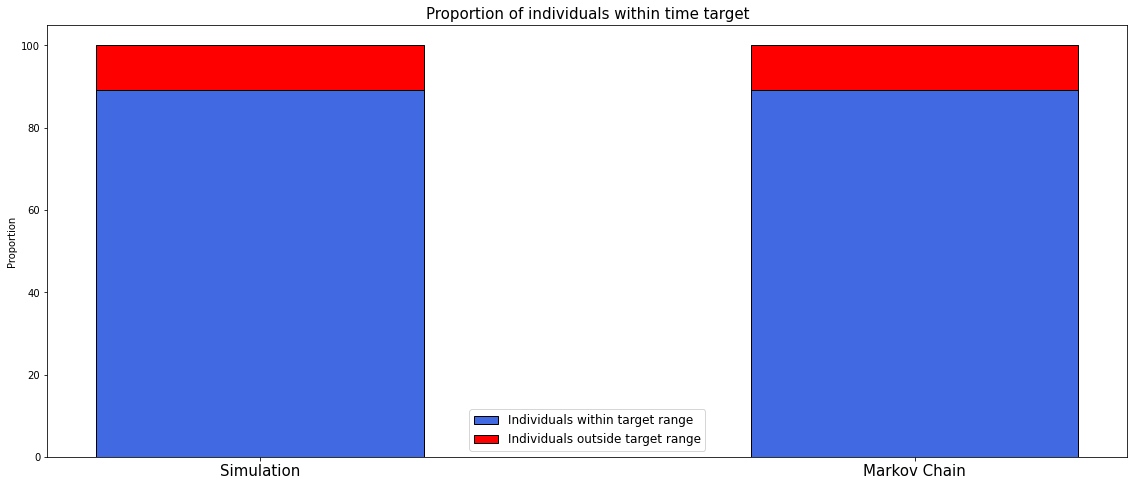

In [14]:
fig = plt.figure(figsize=(15, 6))
ax = fig.add_axes([0,0,1,1])
x_points = (1, 2)
props_within = np.array(100 * (target_1 + target_2) / (total_1 + total_2), 100*mean_prop)
ax.bar(x_points, props_within, width=.5, color='royalblue', ec="black")
ax.bar(x_points, 100 - np.array(props_within), bottom=props_within, width=.5, color='red', ec="black")
ax.legend(["Individuals within target range", "Individuals outside target range"], fontsize=12)
plt.ylabel("Proportion")
plt.title("Proportion of individuals within time target", fontsize=15)
ax.set_xticks(x_points)
ax.set_xticklabels(("Simulation", "Markov Chain"), fontsize=15);

# Hospital strategies

$$
    \LARGE{T_i \in [1, N_i]}
$$

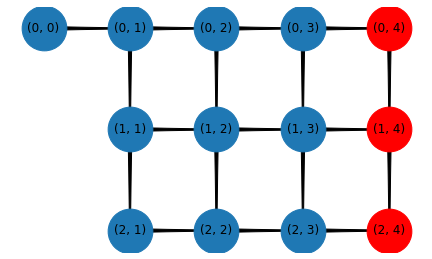

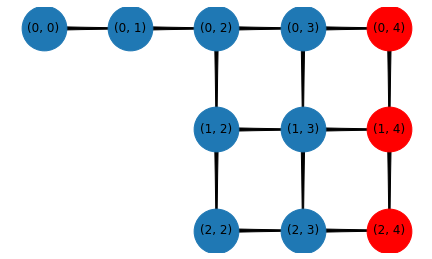

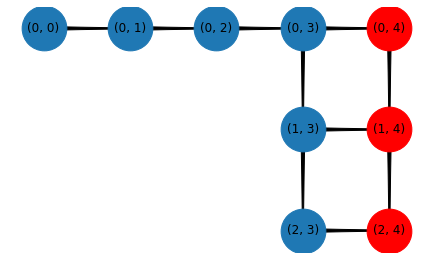

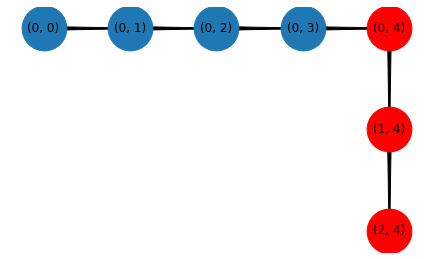

In [15]:
for t in range(1, params["system_capacity"] + 1):
    abg.markov.visualise_markov_chain(
        num_of_servers=params["num_of_servers"],
        threshold=t,
        system_capacity=params["system_capacity"],
        buffer_capacity=params["buffer_capacity"],
    );

# Playing the game

In [16]:
lambda_2 = 4

params_1 = {
    "lambda_1_1" : 1,
    "mu_1" : 1,
    "num_of_servers_1" : 3,
    "system_capacity_1" : 6,
    "buffer_capacity_1" : 3
}

params_2 = {
    "lambda_1_2" : 1,
    "mu_2" : 1,
    "num_of_servers_2" : 4,
    "system_capacity_2" : 6,
    "buffer_capacity_2" : 3
}

target = 3.5

In [17]:
A, B, R = abg.game.get_payoff_matrices(
    lambda_2=lambda_2,
    target=target,
    **params_1,
    **params_2,
)

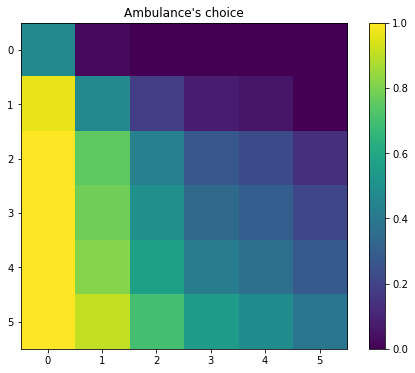

In [18]:
plt.figure(figsize=(8,6))
plt.imshow(R)
plt.title("Ambulance's choice")
plt.colorbar();

In [21]:
my_game = abg.game.build_game_using_payoff_matrices(
    lambda_2=lambda_2,
    target=target,
    **params_1,
    **params_2,
)
my_game

Bi matrix game with payoff matrices:

Row player:
[[-3.11423934e-04 -3.11423934e-04 -3.11423934e-04 -3.11423934e-04
  -3.11423934e-04 -3.11423934e-04]
 [-2.69894872e-04 -2.73182570e-04 -2.85947898e-04 -2.97555312e-04
  -3.01184471e-04 -3.11423934e-04]
 [-1.46439233e-04 -1.53205743e-04 -1.78591460e-04 -2.10920651e-04
  -2.24187402e-04 -2.53689484e-04]
 [-1.01362094e-05 -3.32490715e-06 -5.21349959e-06 -4.21880740e-05
  -6.63862751e-05 -1.25443095e-04]
 [-5.15578125e-04 -4.07632907e-04 -1.59012915e-04 -2.29646124e-05
  -2.17750505e-06 -1.74482652e-05]
 [-1.82369312e-03 -1.60234271e-03 -9.28358609e-04 -3.93590193e-04
  -2.07360168e-04 -3.65210893e-05]]

Column player:
[[-3.82530431e-04 -3.77077498e-04 -3.57699700e-04 -2.93084263e-04
  -9.05481242e-05 -8.00437095e-06]
 [-3.82530431e-04 -3.77409795e-04 -3.58559231e-04 -2.95668585e-04
  -9.74506679e-05 -8.00437095e-06]
 [-3.82530431e-04 -3.78607983e-04 -3.61175712e-04 -3.04346347e-04
  -1.25391190e-04 -2.58915422e-05]
 [-3.82530431e-04 -3.788

In [22]:
xs, ys = my_game.asymmetric_replicator_dynamics(timepoints=np.linspace(1, 50000, 100))

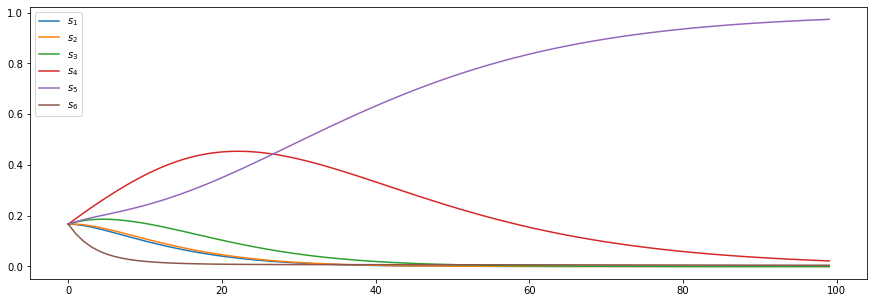

In [23]:
plt.figure(figsize=(15,5))
plt.plot(xs)
plt.legend([f"$s_{i + 1}$" for i in range(len(xs[0]))]);

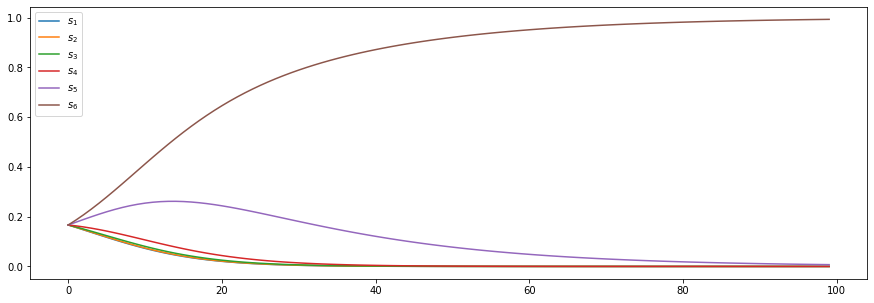

In [24]:
plt.figure(figsize=(15,5))
plt.plot(ys)
plt.legend([f"$s_{i + 1}$" for i in range(len(ys[0]))]);